In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Import Mobility Data

In [2]:
# keep FIPS as string to preserve leading zeroes

In [3]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [4]:
combined['date'] = combined['date'].astype("datetime64")

In [5]:
combined_sub = combined.drop(columns=['Unnamed: 0','Date','locationcol'])

In [6]:
list(combined_sub.columns)

['date',
 'County_FIPS',
 'StateCD',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 

## Examine per-county distributions

In [9]:
county = combined_sub.groupby("County_FIPS")[["Name","StateCD","Population_ACS","PCT_Black_ACS","PCT_Hisp_ACS","UrbanCD","Metro","Deaths","Deaths_PER_100K"]].max()

In [10]:
county = pd.DataFrame(county) #.reset_index(inplace=True)

In [11]:
county.reset_index(inplace=True)

In [12]:
county.isna().value_counts()

County_FIPS  Name   StateCD  Population_ACS  PCT_Black_ACS  PCT_Hisp_ACS  UrbanCD  Metro  Deaths  Deaths_PER_100K
False        False  False    False           False          False         False    False  False   False              2822
                                             True           False         False    False  False   False                 1
dtype: int64

In [13]:
county_samp = county.sample(frac=.1)

In [14]:
county.PCT_Hisp_ACS.describe()

count    2823.000000
mean        9.147540
std        13.683896
min         0.000000
25%         2.104021
50%         4.065384
75%         9.320412
max        99.184800
Name: PCT_Hisp_ACS, dtype: float64

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


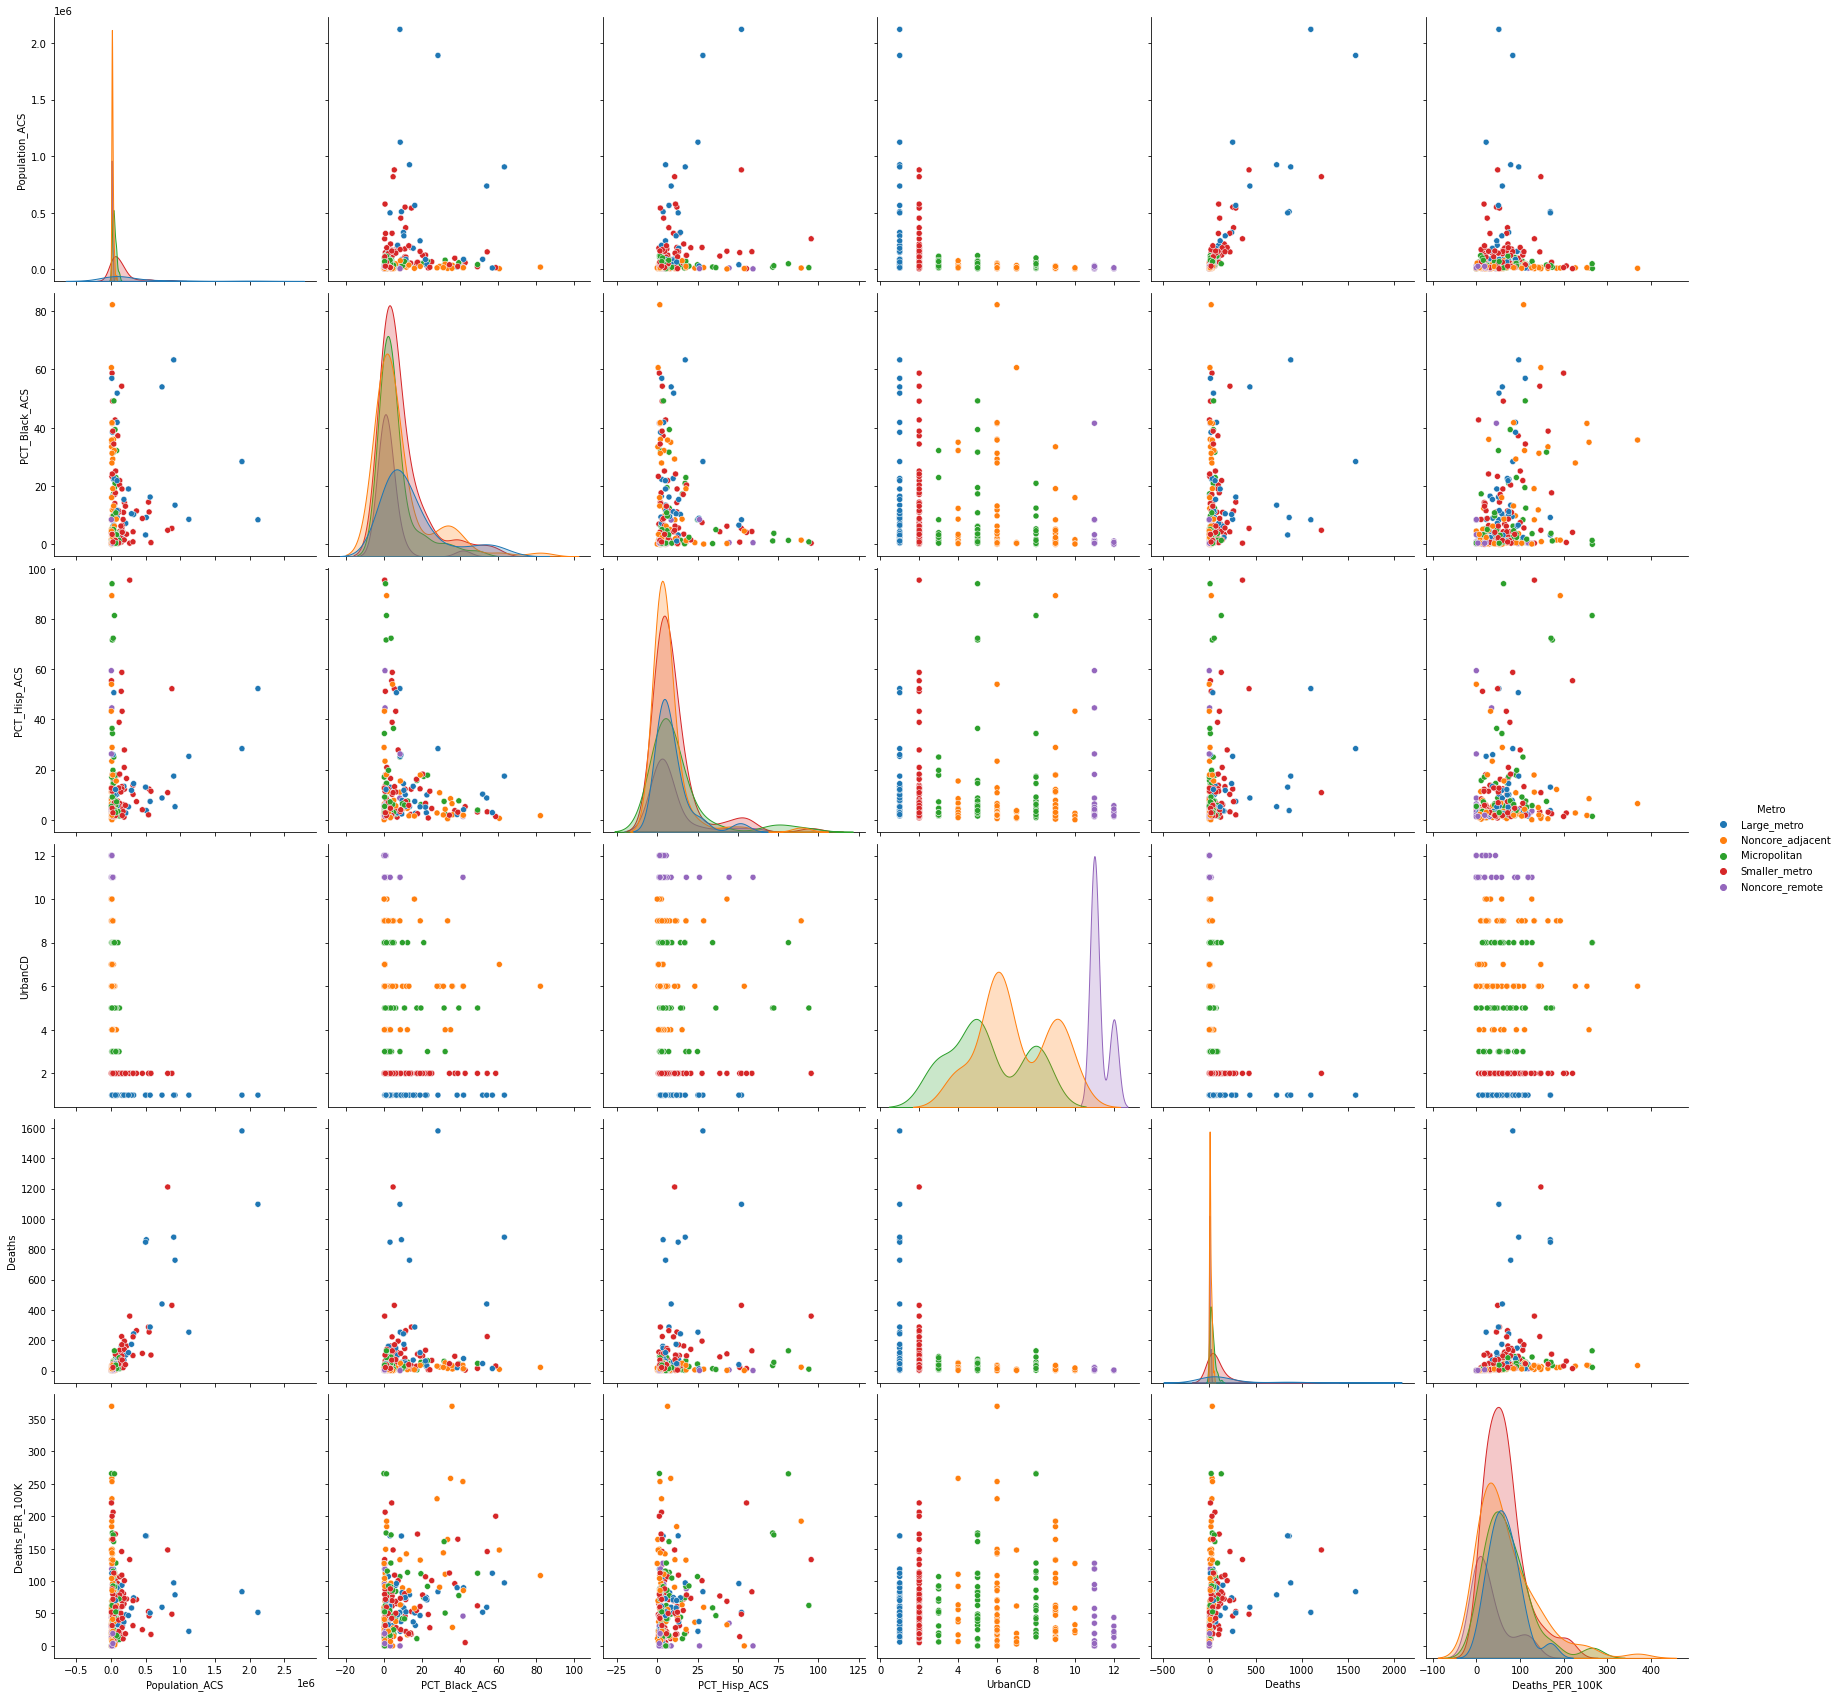

In [15]:
sns.pairplot(county_samp, hue="Metro", height=4)

In [16]:
county[county.Name.str.contains("Fairfax")]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
2615,51600,Fairfax city,VA,23580.0,4.85581,16.899915,1,Large_metro,8,33.927057


In [19]:
county.Deaths_PER_100K.describe()

count    2823.000000
mean       64.603104
std        59.626855
min         0.000000
25%        23.230882
50%        49.270007
75%        87.997868
max       519.210800
Name: Deaths_PER_100K, dtype: float64

In [21]:
county[(county.Deaths_PER_100K >= county.Deaths_PER_100K.max()/2)]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
42,01085,Lowndes County,AL,10362.0,74.522293,0.685196,2,Smaller_metro,29,279.868751
79,04001,Apache County,AZ,71602.0,0.508366,6.108768,6,Noncore_adjacent,187,261.165889
133,05081,Little River County,AR,12494.0,20.481831,3.313591,2,Smaller_metro,39,312.149832
143,05101,Newton County,AR,7898.0,0.012661,1.367435,8,Micropolitan,21,265.890099
350,12125,Union County,FL,15300.0,22.137255,5.431373,4,Noncore_adjacent,53,346.405229
400,13099,Early County,GA,10405.0,50.956271,2.152811,6,Noncore_adjacent,36,345.987506
419,13141,Hancock County,GA,8667.0,73.012576,1.799931,8,Micropolitan,45,519.210800
431,13165,Jenkins County,GA,8929.0,35.759884,6.439691,6,Noncore_adjacent,33,369.582260
432,13167,Johnson County,GA,9800.0,33.765306,2.326531,8,Micropolitan,28,285.714286
468,13243,Randolph County,GA,7206.0,59.741882,1.665279,6,Noncore_adjacent,30,416.319734


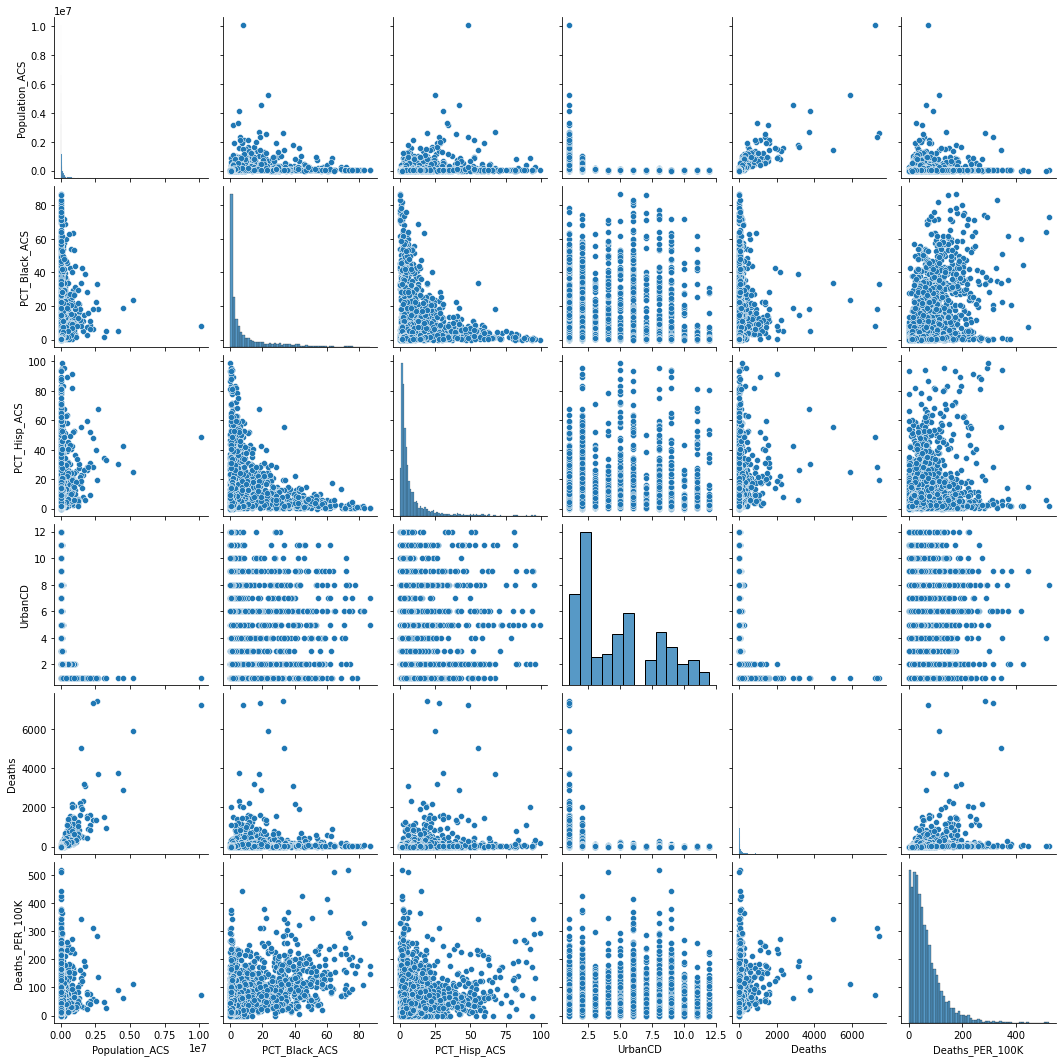

In [35]:
sns.pairplot(county)

In [23]:
county[county.Metro.isna() == True]

,County_FIPS,Name,StateCD,Population_ACS,PCT_Black_ACS,PCT_Hisp_ACS,UrbanCD,Metro,Deaths,Deaths_PER_100K
